Importing The Dependencies


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

loading the MNIST data from keras.datasets


In [2]:
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
#shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 images
Test data   = 10,000 images


Image dimension -->28 x 28
Grayscale Image --> 1 channel


In [5]:
# printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


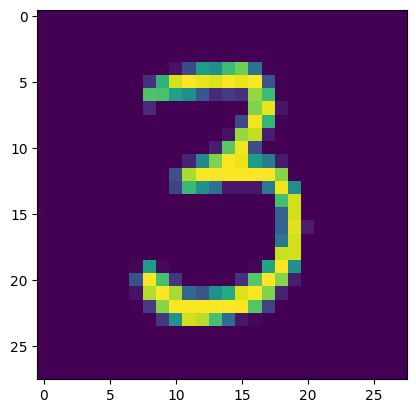

3


In [7]:
# displaying image
plt.imshow(X_train[50])
plt.show()

# print the corresponding label
print(Y_train[50])

In [8]:
print(Y_train.shape , Y_test.shape)

(60000,) (10000,)


In [9]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


we can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset,if not,we have to resize all the images to a common dimension

In [10]:
# scaling the values
X_train = X_train/255
X_test = X_test/255

In [11]:
# printing the 10th image
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

building the neural network

In [14]:
# setting up the layers of the Neural Network

model = keras.Sequential([
                 keras.layers.Flatten(input_shape=(28,28)),
                 keras.layers.Dense(50,activation='relu'),
                 keras.layers.Dense(50,activation='relu'),
                 keras.layers.Dense(10,activation='sigmoid')
    ])

In [16]:
# compiling the neural network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [17]:
# training the neural network
model.fit(X_train , Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2992 - accuracy: 0.9137
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1383 - accuracy: 0.9580
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1028 - accuracy: 0.9692
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0842 - accuracy: 0.9742
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0687 - accuracy: 0.9792
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0582 - accuracy: 0.9813
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0513 - accuracy: 0.9837
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0437 - accuracy: 0.9862
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0384 - accuracy: 0.9871
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.032

Training data accuracy = 98.9%

Accuracy on test data :

In [18]:
loss , accuracy = model.evaluate(X_test,Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0947 - accuracy: 0.9755
0.9754999876022339


Test data accuracy = 97.5%

In [19]:
print(X_test.shape)

(10000, 28, 28)


<function matplotlib.pyplot.show(close=None, block=None)>

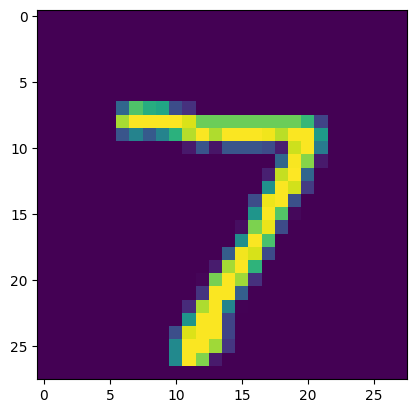

In [20]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show

In [22]:
print(Y_test[0])

7


In [23]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [24]:
print(Y_pred.shape)

(10000, 10)


In [25]:
print(Y_pred[0])

[1.0461009e-04 7.2902383e-04 1.5950096e-01 9.7868282e-01 9.3399969e-08
 3.2131493e-04 2.1995128e-09 9.9999696e-01 1.5121772e-03 1.4903857e-01]


model.predict() gives the production probability of each class for that data point

In [26]:
# converting the prediction probabilities to a class label\
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [27]:
# converting the prediction probabilities to a class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test --> True labels

Y_pred_labels --> Predicted labels

Confusion Matrix

In [29]:
conf_mat = confusion_matrix(Y_test,Y_pred_labels)

In [30]:
print(conf_mat)

tf.Tensor(
[[ 969    0    1    1    0    3    3    1    2    0]
 [   0 1124    2    3    0    0    2    0    4    0]
 [   5    3  993    6    2    1    3    8   11    0]
 [   0    0    3  993    0    3    0    4    2    5]
 [   0    0    6    0  962    0    2    2    0   10]
 [   1    0    0   17    1  864    2    1    4    2]
 [   6    1    1    1    4    9  934    0    2    0]
 [   0    5   10    4    0    0    1  999    1    8]
 [   1    1    4   12    3   10    0    3  937    3]
 [   2    5    0    4    8    3    0    5    2  980]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

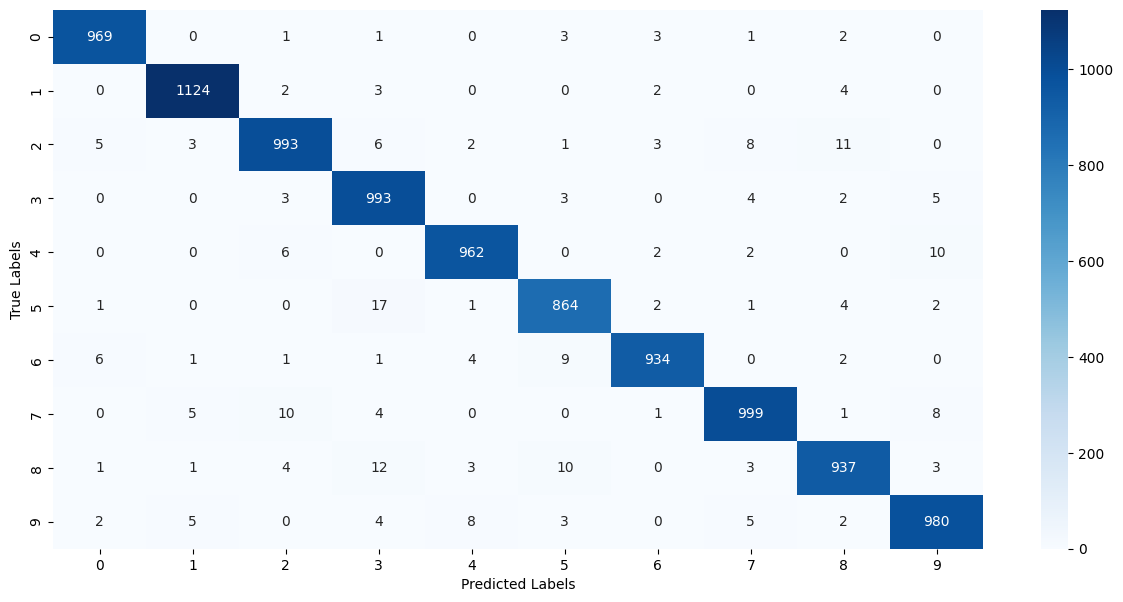

In [31]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Buliding a predictive system

In [53]:
input_image_path = '/content/mnist1.png'
input_image = cv2.imread(input_image_path)

In [54]:
type(input_image)

numpy.ndarray

In [55]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


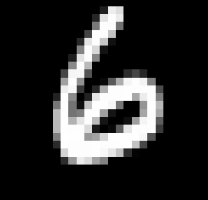

In [56]:
cv2_imshow(input_image)

In [57]:
input_image.shape

(200, 208, 3)

In [58]:
grayscale = cv2.cvtColor(input_image , cv2.COLOR_RGB2GRAY)

In [59]:
grayscale.shape

(200, 208)

In [60]:
input_image_resize = cv2.resize(grayscale , (28,28))

In [62]:
input_image_resize.shape

(28, 28)

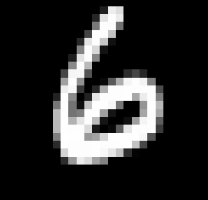

In [64]:
cv2_imshow(input_image)

In [65]:
input_image_resize= input_image_resize/255

In [66]:
type(input_image_resize)

numpy.ndarray

In [67]:
image_reshaped=np.reshape(input_image_resize ,[1,28,28])

In [68]:
input_prediction=model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 20ms/step
[[6.7492670e-01 4.0057625e-06 1.7959679e-05 1.2007235e-04 3.7243313e-05
  9.1079021e-01 1.0000000e+00 1.1161773e-06 9.9027932e-01 6.3423364e-04]]


In [69]:
input_pred_label= np.argmax(input_prediction)


In [70]:
print(input_pred_label)

6


**Predictive** **system**

Path of the image to be predicted: /content/mnist2.png


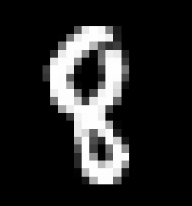

1/1 [==============================] - 0s 21ms/step
The handwritten digit is recognised as  8


In [75]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image , cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale , (28,28))

input_image_resize= input_image_resize/255

image_reshaped=np.reshape(input_image_resize ,[1,28,28])

input_prediction=model.predict(image_reshaped)

input_pred_label= np.argmax(input_prediction)

print('The handwritten digit is recognised as ', input_pred_label)